## Initial imports and data download if you need the KPF input files

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from rvdata.core.models.level2 import RV2


#To download the input files for this example, set download=1 to run the code block below
download=0

if download == 1:
    import requests

    def download_file(url, filename):
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful
        with open(filename, "wb") as file:
            file.write(response.content)

    #Download the native, input FITS files for this example if not already on your computer
    file_urls = {
        "KPF": [
            "https://zenodo.org/records/15021737/files/KP.20250208.17485.59.fits?download=1",
            "https://zenodo.org/records/15021737/files/KP.20250208.17485.59_L1.fits?download=1",
        ]
    }


## Using the L2 translator to go from native KPF data format to the EPRV Standard Format

In [12]:
#Translating a KPF File [change file destination to where you have placed the L0 and L1 KPF files from Zenodo]
l1file = '/Users/jenburt/Desktop/EPRV_Standard/KP.20240920.37616.85_L1.fits'
l0file = '/Users/jenburt/Desktop/EPRV_Standard/KP.20240920.37616.85.fits'

with fits.open(l1file) as hdul:
        datetime = hdul[0].header['DATE-BEG']
        timestamp, seconds = datetime.split('.')

filetime = timestamp.replace(":","").replace("-","")
kpf_l2_filename = './docs/tutorials/KPFL2_'+filetime.replace("-:","")+'.fits'

kpf_l2 = RV2.from_fits(l1file, l0file=l0file, instrument="KPF")
kpf_l2.to_fits(kpf_l2_filename)

/Users/jenburt/Documents/GitHub/RVData/rvdata/instruments/kpf/level2.py:110: UserWarning: Blaze extensions not found in KPF L1 file, using default.
  warnings.warn("Blaze extensions not found in KPF L1 file, using default.")


## Examining What's Inside the Community Standard L2 File

Once you have created the community standard L2 fits file, you can read it into python either as a traditional FITS object using astropy's fits.open() function, or as a python object using the from_fits() function within RV2: 

`from astropy.io import fits` <br>
`l2 = fits.open(kpf_l2_filename)`

OR 

`from rvdata.core.models.level2 import RV2` <br>
`l2_obj = RV2.from_fits(l2_standard)`

In [13]:
#In this example we'll use the astropy fits.open() approach

l2 = fits.open(kpf_l2_filename)

#The primary header contains useful info about what was observed, what's in each trace, etc. The keywords will be the same regardless
#of what facility was used to take the data, so you can always query the file in the same way.
primary_header = l2[0].header
print('What telescope produced this observation?  ',primary_header['TELESCOP'])
print('What instrument was used?  ',primary_header['INSTRUME'])
print('What object was observed?  ',primary_header['OBJECT'],)
print('How many traces are produced by the spectrograph?  ',primary_header['NUMTRACE'] )
print('What is in each of the traces? ')
for i in range(1,primary_header['NUMTRACE']+1):
    print('Trace',i,primary_header['TRACE'+str(i)])

What telescope produced this observation?   Keck I
What instrument was used?   KPF
What object was observed?   4628
How many traces are produced by the spectrograph?   5
What is in each of the traces? 
Trace 1 EtalonFiber
Trace 2 Target
Trace 3 Target
Trace 4 Target
Trace 5 Sky


### The Extension Description table, located in the "EXT_DESCRIPT" extension, lists all of the FITS extensions in the L2 file

In [14]:
EXT_DESCRIPT = pd.DataFrame(l2['EXT_DESCRIPT'].data)
EXT_DESCRIPT

,HDU,Name,DataType,MinBetDepth,Multiplicity,Required,Description
0,0,PRIMARY,PrimaryHDU,NaN,False,True,EPRV Standard FITS HEADER (no data)
1,1,INSTRUMENT_HEADER,ImageHDU,NaN,False,True,Inherited instrument header
2,2,RECEIPT,BinTableHDU,NaN,False,True,Table of operations that have been performed o...
3,3,DRP_CONFIG,BinTableHDU,NaN,False,True,Pipeline details (settings etc) to go from nat...
4,4,EXT_DESCRIPT,BinTableHDU,NaN,False,True,Table describing contents of each extension
5,5,ORDER_TABLE,BinTableHDU,NaN,True,True,Table capturing the wavelength extent of each ...
6,6,TRACE1_FLUX,ImageHDU,NaN,True,True,calibration fiber flux
7,7,TRACE1_WAVE,ImageHDU,64.0,True,True,calibration fiber wavelength solution
8,8,TRACE1_VAR,ImageHDU,NaN,True,True,calibration fiber variance
9,9,TRACE1_BLAZE,ImageHDU,NaN,True,True,calibration fiber blaze


### And the Order Table, located in the "ORDER_TABLE" extension, details the start and end wavelengths of each echelle order

In [15]:
ORDER_TABLE = pd.DataFrame(l2['ORDER_TABLE'].data)
ORDER_TABLE

,echelle_order,order_index,wave_start,wave_end
0,137,0,4457.417300,4511.247067
1,136,1,4490.139976,4544.370871
2,135,2,4523.347247,4577.983372
3,134,3,4557.048497,4612.098110
4,133,4,4591.257185,4646.723892
...,...,...,...,...
62,75,62,8136.956474,8236.398718
63,74,63,8246.781978,8347.579235
64,73,64,8359.614937,8461.801019
65,72,65,8475.579896,8579.190231


## Plotting Examples of L2 Spectra

From the Extension Description table, we know that the stellar data is contained in Traces 2, 3, and 4 -- so we can take a look at those

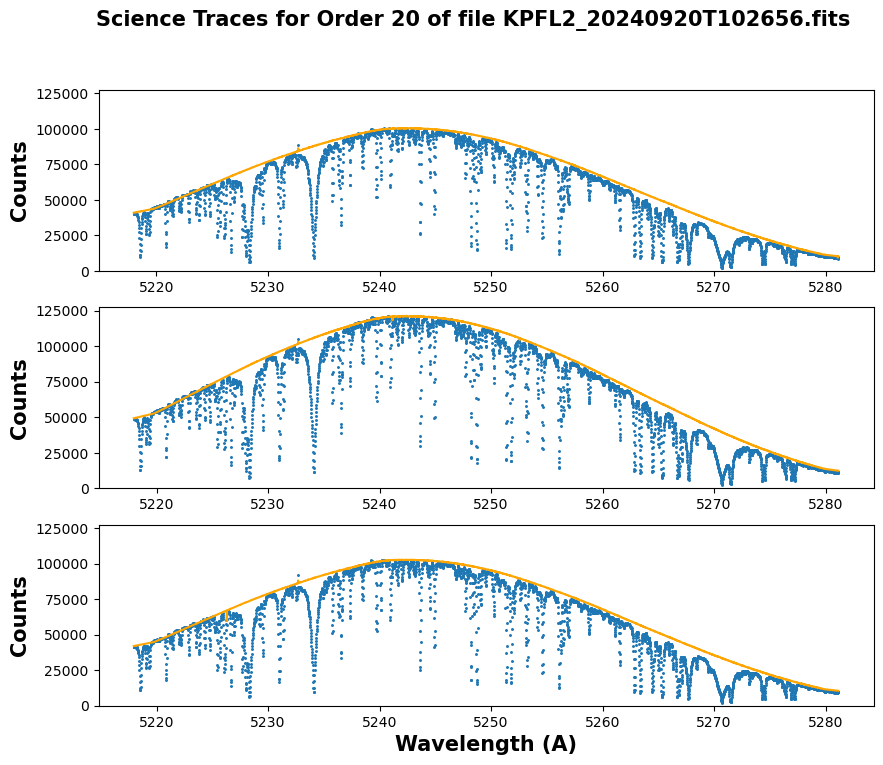

In [17]:
#specify what order you'd like to plot
order = 20

#standardize the y-axis range based on the order with this highest flux measurements so it's easier to compare
flux_max = np.max([np.max(l2['TRACE2_FLUX'].data[order]), np.max(l2['TRACE3_FLUX'].data[order]), np.max(l2['TRACE4_FLUX'].data[order])])
ymax = flux_max*1.05

#Calculate scaling factors between the blaze extensions and the flux extensions for easier visual comparison
blz_scale2 = np.nanmax(l2['TRACE2_FLUX'].data[order]/np.nanmax(l2['TRACE2_BLAZE'].data[order]))
blz_scale3 = np.nanmax(l2['TRACE3_FLUX'].data[order]/np.nanmax(l2['TRACE3_BLAZE'].data[order]))
blz_scale4 = np.nanmax(l2['TRACE4_FLUX'].data[order]/np.nanmax(l2['TRACE4_BLAZE'].data[order]))

fig = plt.figure(1,[10,8])

ax1 = fig.add_subplot(3,1,1)
ax1.scatter(l2['TRACE2_WAVE'].data[order],l2['TRACE2_FLUX'].data[order],marker='.',s=5)
ax1.plot(l2['TRACE2_WAVE'].data[order],l2['TRACE2_BLAZE'].data[order]*blz_scale2,color='orange')
ax1.set_ylim(0,ymax)
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')

ax2 = fig.add_subplot(3,1,2)
ax2.scatter(l2['TRACE3_WAVE'].data[order],l2['TRACE3_FLUX'].data[order],marker='.',s=5)
ax2.plot(l2['TRACE3_WAVE'].data[order],l2['TRACE3_BLAZE'].data[order]*blz_scale3,color='orange')
ax2.set_ylim(0,ymax)
ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')

ax3 = fig.add_subplot(3,1,3)
ax3.scatter(l2['TRACE4_WAVE'].data[order],l2['TRACE4_FLUX'].data[order],marker='.',s=5)
ax3.plot(l2['TRACE4_WAVE'].data[order],l2['TRACE4_BLAZE'].data[order]*blz_scale4,color='orange')
ax3.set_ylim(0,ymax)
ax3.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax3.set_xlabel('Wavelength (A)',fontsize=15,fontweight='bold')

filename_pieces = kpf_l2_filename.split('/')

fig.suptitle('Science Traces for Order '+str(order)+' of file '+filename_pieces[-1],fontsize=15,fontweight='bold')

plt.show()

## Read in data from multiple instruments on the same star

## Generate an EPRV Standard L2 file for NEID & KPF

In [ ]:
from rvdata.instruments.neid.level2 import RV2, NEIDRV2

neid_L2_Filename = 'NEIDL2_20240921T052641.fits'

neid_L2_obj = NEIDRV2.from_fits('neidL2_20240921T052641.fits', instrument="NEID")
neid_L2_obj.to_fits(neid_L2_Filename)

kpf_l1file = 'KP.20240920.37616.85_L1.fits'
kpf_l0file = 'KP.20240920.37616.85.fits'

kpf_l2_filename = 'KPFL2_20240920T102656.fits'

kpf_l2 = RV2.from_fits(l1file, l0file=l0file, instrument="KPF")
kpf_l2.to_fits(kpf_l2_filename)

## Plot an overlapping order, first with the blaze function and then after dividing it out

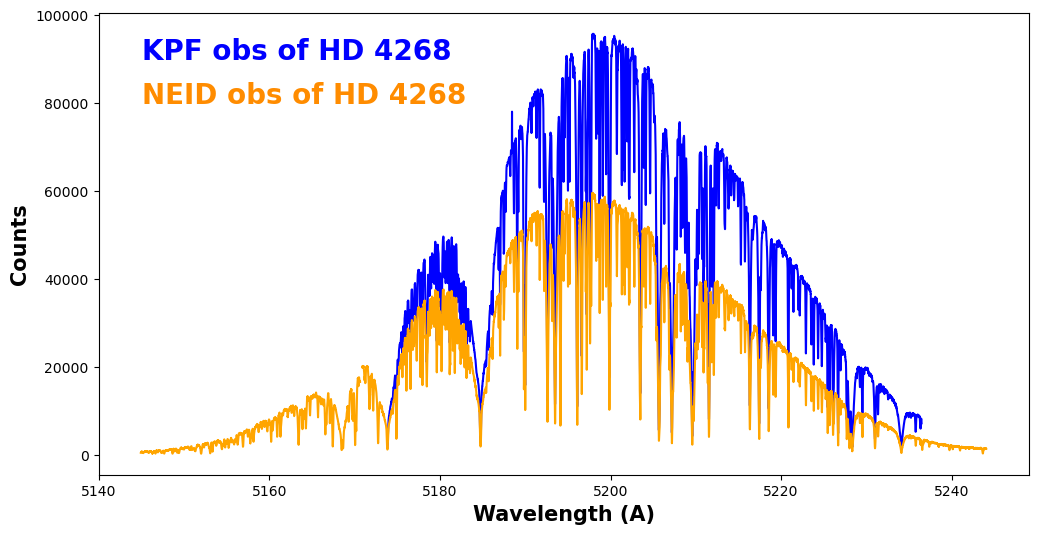

In [ ]:
kpf_obs =  fits.open('./docs/tutorials/KPFL2_20240920T102656.fits')
neid_obs = fits.open('./docs/tutorials/NEIDL2_20240921T052641.fits')

kpf_order = 19
neid_order1 = 55

fig = plt.figure(1,[12,6])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(kpf_obs['TRACE2_WAVE'].data[kpf_order],kpf_obs['TRACE2_FLUX'].data[kpf_order],color='blue')
ax1.plot(neid_obs['TRACE1_WAVE'].data[neid_order1],neid_obs['TRACE1_FLUX'].data[neid_order1],color='orange')
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax1.set_xlabel('Wavelength (A)',fontsize=15,fontweight='bold')

ax1.text(5145,90000,'KPF obs of HD 4268',color='blue',fontsize=20,fontweight='bold')
ax1.text(5145,80000,'NEID obs of HD 4268',color='darkorange',fontsize=20,fontweight='bold')

plt.show()

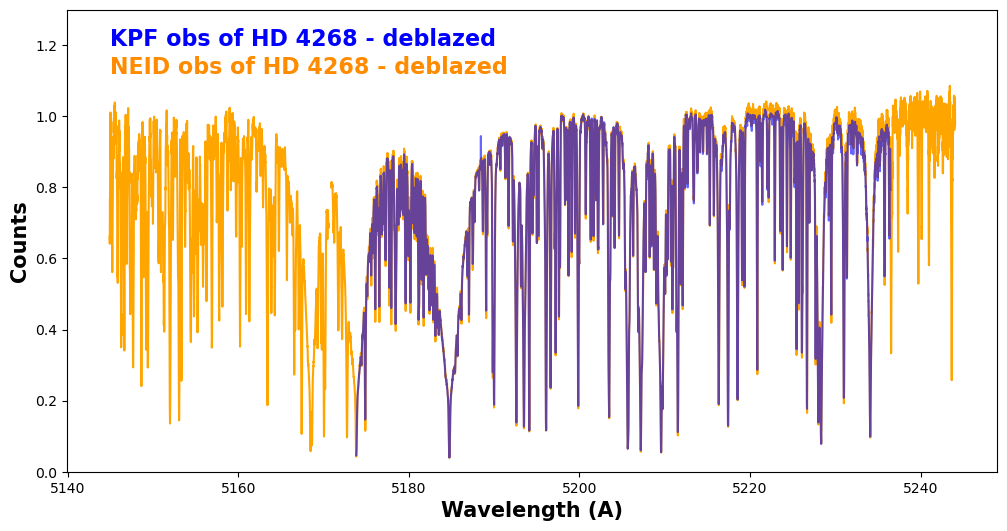

In [96]:
kpf_obs =  fits.open('./docs/tutorials/KPFL2_20240920T102656.fits')
neid_obs = fits.open('./docs/tutorials/NEIDL2_20240921T052641.fits')

kpf_order = 19
neid_order = 55

#Calculate scaling factors between the blaze extensions and the flux extensions for easier visual comparison
blz_scale_kpf = np.nanmax(kpf_obs['TRACE2_FLUX'].data[kpf_order]/np.nanmax(kpf_obs['TRACE2_BLAZE'].data[kpf_order]))
blz_scale_neid = np.nanmax(neid_obs['TRACE1_FLUX'].data[neid_order]/np.nanmax(neid_obs['TRACE1_BLAZE'].data[neid_order]))

fig = plt.figure(1,[12,6])
ax1 = fig.add_subplot(1,1,1)
ax1.plot(neid_obs['TRACE1_WAVE'].data[neid_order],neid_obs['TRACE1_FLUX'].data[neid_order] / 
         (neid_obs['TRACE1_BLAZE'].data[neid_order] * blz_scale_neid) ,color='orange')
ax1.plot(kpf_obs['TRACE2_WAVE'].data[kpf_order],kpf_obs['TRACE2_FLUX'].data[kpf_order] / 
         (kpf_obs['TRACE2_BLAZE'].data[kpf_order] * blz_scale_kpf) ,color='blue',alpha=.6)
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax1.set_xlabel('Wavelength (A)',fontsize=15,fontweight='bold')
ax1.set_ylim(0,1.3)

ax1.text(5145,1.2,'KPF obs of HD 4268 - deblazed',color='blue',fontsize=16,fontweight='bold')
ax1.text(5145,1.12,'NEID obs of HD 4268 - deblazed',color='darkorange',fontsize=16,fontweight='bold')

plt.show()